In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

In [ ]:
pbp_basic = pd.read_csv('../../Data/play-by-play/processed_pbp_dataset.csv')
pbp_basic.shape

In [3]:
pbp_basic['Player-Injured-On-Play'].value_counts() #large class imbalance

0    86717
1     1619
Name: Player-Injured-On-Play, dtype: int64

In [5]:
categorical_cols = ['OffenseTeam', 'DefenseTeam', 'play_type', 'side_of_field','stadium','play_type_nfl','roof','surface_type','home_team', 'away_team','season_type','series_result',]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    pbp_basic[col] = le.fit_transform(pbp_basic[col].astype(str))
    label_encoders[col] = le  # Save encoders if needed later

In [8]:
X = pbp_basic.drop(columns=['Player-Injured-On-Play', 'date','play_id', 'game_id', 'old_game_id','Description','drive_time_of_possession','num_injuries',])
y = pbp_basic['Player-Injured-On-Play']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

dt_model = DecisionTreeClassifier(random_state=50, max_depth=5)  
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
print(f"Accuracy: {dt_accuracy}")
print(dt_precision)
print(dt_recall)

Accuracy: 0.9812655648630292
0.0
0.0


In [10]:
conf_matrix = confusion_matrix(y_test, dt_y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[17337     7]
 [  324     0]]


In [11]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17344
           1       0.00      0.00      0.00       324

    accuracy                           0.98     17668
   macro avg       0.49      0.50      0.50     17668
weighted avg       0.96      0.98      0.97     17668



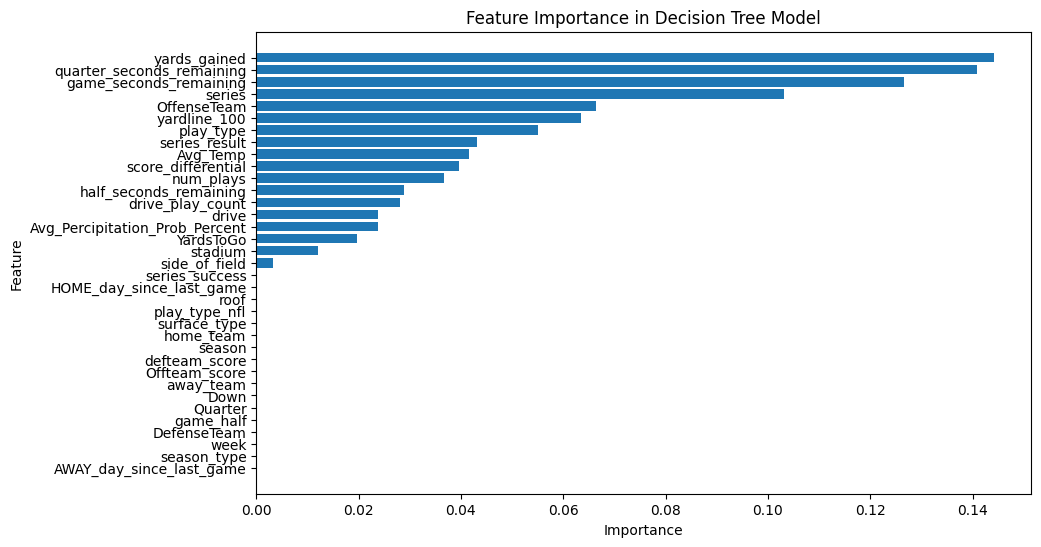

                      Feature  Importance
17               yards_gained    0.144265
8   quarter_seconds_remaining    0.140963
10     game_seconds_remaining    0.126598
22                     series    0.103071
4                 OffenseTeam    0.066308
7                yardline_100    0.063489
16                  play_type    0.055070
24              series_result    0.043072
31                   Avg_Temp    0.041619
20         score_differential    0.039618


In [ ]:
feature_importance = dt_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6), facecolor='white')
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()
print(importance_df.head(10))
